# Celltype Proportion Exploration


In [1]:
# import packages
import scimap as sm
import anndata as ad

Running SCIMAP  1.3.8


/Users/aj/miniconda3/envs/scimap/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html



In [2]:
# Load the data that we saved in the last tutorial (with ROIs added)
adata = ad.read_h5ad('/Users/aj/Dropbox (Partners HealthCare)/nirmal lab/resources/exemplarData/scimapExampleData/scimapExampleData.h5ad')

### Investigate cell-type composition within the ROI's

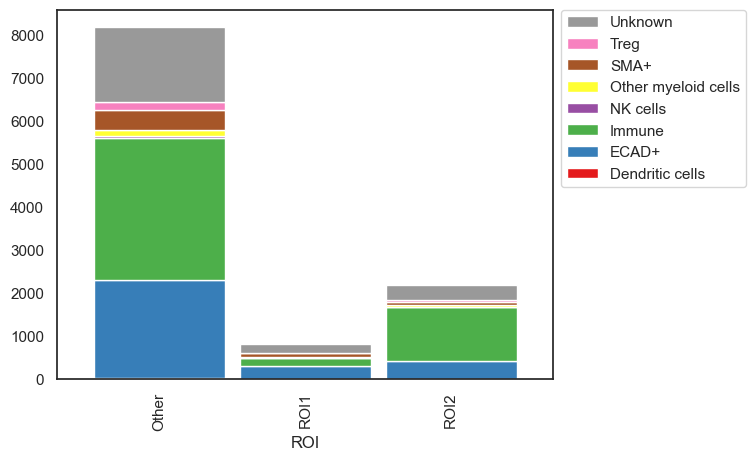

In [3]:
# plots the absolute count of cells within each ROI
sm.pl.stacked_barplot (adata,
                       x_axis='ROI',
                       y_axis='phenotype',
                       method='absolute')

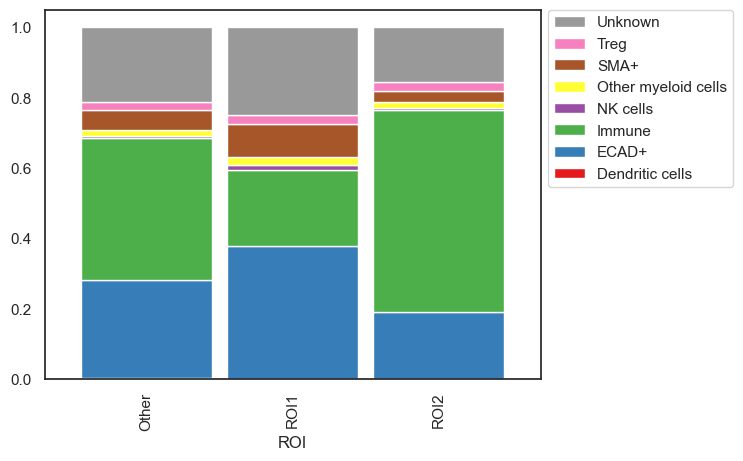

In [4]:
# Plot the number of cells normalized to 100% 
sm.pl.stacked_barplot (adata,
                       x_axis='ROI',
                       y_axis='phenotype',
                       method='percent')

The `stacked_barplot` function offers numerous additional parameters for customization. For further details, consult the documentation. For instance, it allows for plotting specific cell types, defining custom orders for both the x and y axes, passing custom color schemes, and more.

### Compute the fold change in cell types across various ROIs.

In [5]:
adata = sm.tl.foldchange (adata, 
                          from_group=['ROI1'], 
                          to_group=None, 
                          imageid='ROI', 
                          phenotype='phenotype',
                          normalize=True, 
                          subset_phenotype=None, 
                          label='foldchange')

calculating P values


/Users/aj/miniconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/foldchange.py:106: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/aj/miniconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/foldchange.py:107: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/aj/miniconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/foldchange.py:112: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

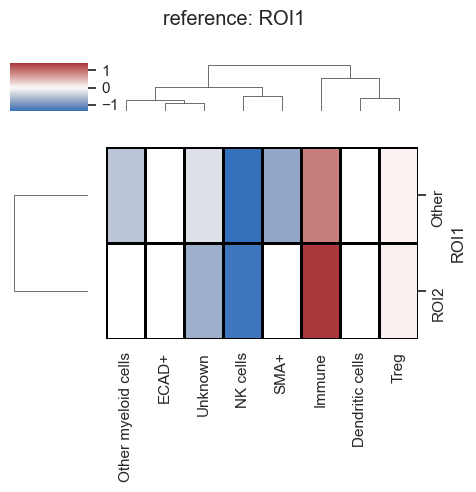

In [9]:
# Now let's plot the results

sm.pl.foldchange (adata, label='foldchange', method='heatmap', p_val=0.05, nonsig_color='grey', figsize=(5,5),
                  log=True, center=0, linecolor='black',linewidths=1)

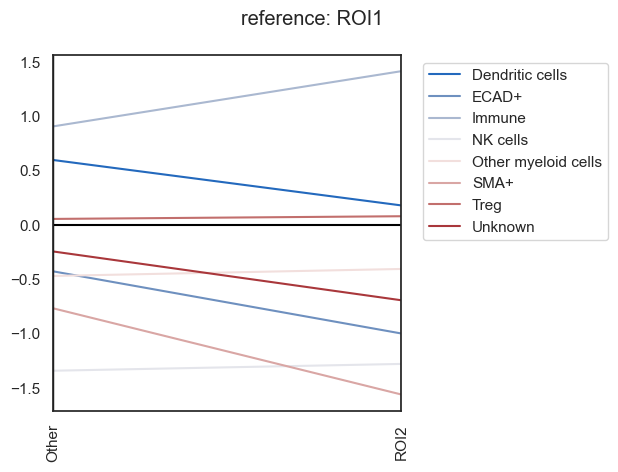

In [11]:
# lets plot the same results differently (this would be more useful when you have more groups to compare)

# Parallel_coordinates plot of the foldchanges
sm.pl.foldchange (adata, label='foldchange', 
                log=True, method='parallel_coordinates', 
                invert_axis=True,
                xticks_rotation=90,
                return_data = False)

### Exploring the phenotypes overlaid on a UMAP

In [12]:
# view the phenotype on a UMAP
adata = sm.tl.umap(adata)

/Users/aj/miniconda3/envs/scimap/lib/python3.10/site-packages/umap/umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.



/Users/aj/miniconda3/envs/scimap/lib/python3.10/site-packages/scimap/plotting/umap.py:285: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



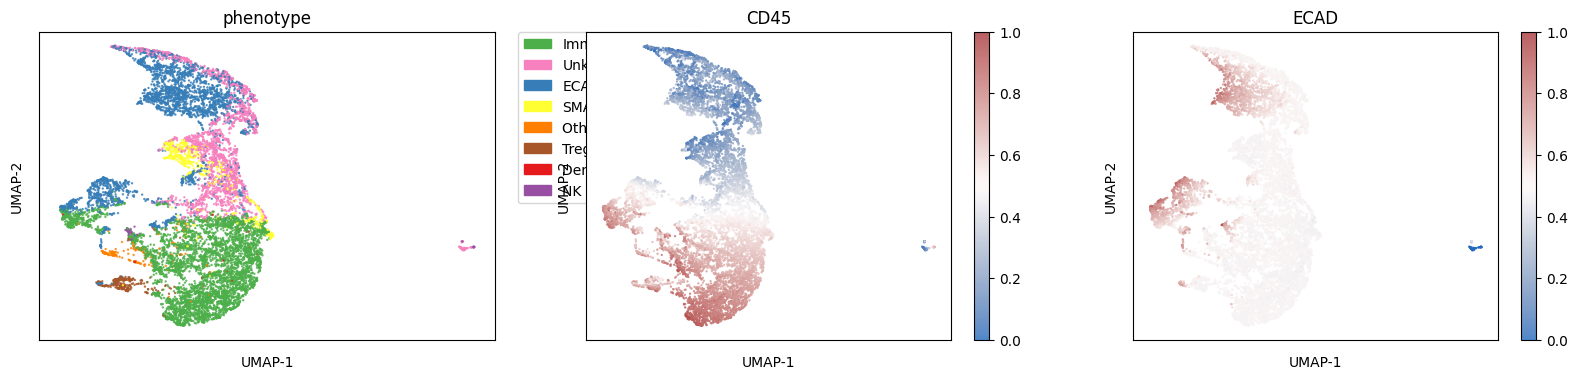

In [25]:
sm.pl.umap(adata, color=['ECAD', 'CD45', 'phenotype'], s=0.5, figsize=(20, 4))

### Exploring the expression of markers with phenotypes

/Users/aj/miniconda3/envs/scimap/lib/python3.10/site-packages/scimap/plotting/heatmap.py:318: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



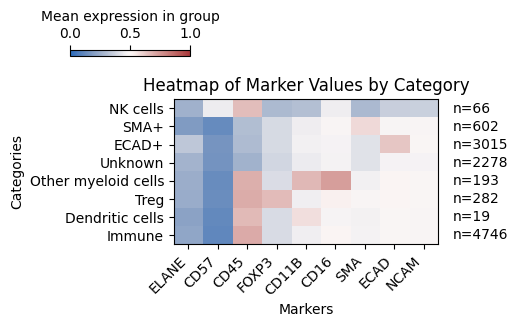

In [29]:
# Heatmap (here values over 0.5 are considered positive as we have scaled the data)
sm.pl.heatmap(adata, groupBy='phenotype', standardScale=None, figsize=(6,3), showPrevalence=True, vmin=0, vmax=1)

### Exploring the correlation of markers

In [30]:
sm.pl.markerCorrelation(adata)

AttributeError: module 'scimap.plotting' has no attribute 'markerCorrelation'

### Exploring the correlation of abundance of cell types between conditions

In [31]:
sm.pl.groupCorrelation(adata, groupBy='phenotype', condition='ROI')

AttributeError: module 'scimap.plotting' has no attribute 'groupCorrelation'

### Save Results

In [ ]:
# Save the results
adata.write('/Users/aj/Dropbox (Partners HealthCare)/nirmal lab/resources/exemplarData/scimapExampleData/scimapExampleData.h5ad')